In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
dataframe1 = pd.read_csv("Medicalpremium.csv")

print("Statistical Summary:")
print(dataframe1.describe())

Statistical Summary:
              Age    Diabetes  BloodPressureProblems  AnyTransplants  \
count  986.000000  986.000000             986.000000      986.000000   
mean    41.745436    0.419878               0.468560        0.055781   
std     13.963371    0.493789               0.499264        0.229615   
min     18.000000    0.000000               0.000000        0.000000   
25%     30.000000    0.000000               0.000000        0.000000   
50%     42.000000    0.000000               0.000000        0.000000   
75%     53.000000    1.000000               1.000000        0.000000   
max     66.000000    1.000000               1.000000        1.000000   

       AnyChronicDiseases      Height      Weight  KnownAllergies  \
count          986.000000  986.000000  986.000000      986.000000   
mean             0.180527  168.182556   76.950304        0.215010   
std              0.384821   10.098155   14.265096        0.411038   
min              0.000000  145.000000   51.000000     

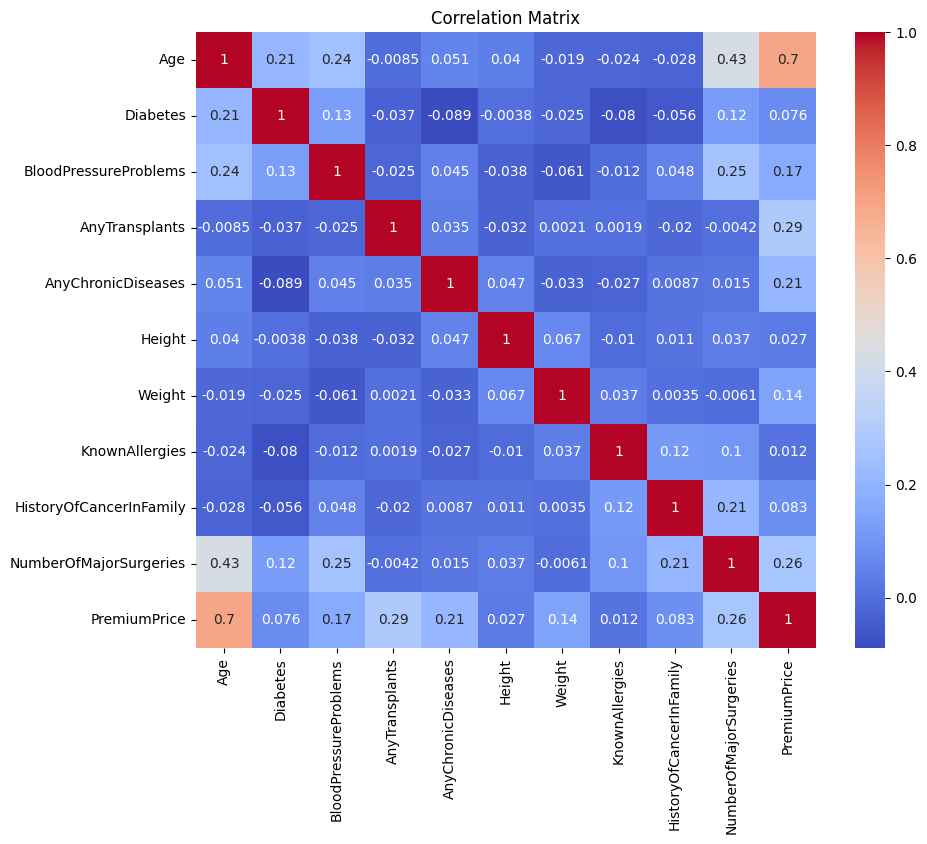

In [3]:
plt.figure(figsize=(10, 8))
sns.heatmap(dataframe1.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [4]:
x_data = dataframe1.drop("PremiumPrice", axis=1)
y_data = dataframe1["PremiumPrice"]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=7)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 17456168.89929999
R-squared Score: 0.5277465057325503


In [5]:
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(comparison.head())

   Actual     Predicted
0   35000  33705.736832
1   25000  26432.232007
2   23000  25756.880881
3   38000  28497.352138
4   25000  22508.107104


In [6]:
x_train_sm = sm.add_constant(x_train)
ols_model = sm.OLS(y_train, x_train_sm).fit()
print("\nOLS Regression Summary:")
print(ols_model.summary())



OLS Regression Summary:
                            OLS Regression Results                            
Dep. Variable:           PremiumPrice   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     145.4
Date:                Wed, 09 Apr 2025   Prob (F-statistic):          2.00e-161
Time:                        00:58:09   Log-Likelihood:                -6619.1
No. Observations:                 690   AIC:                         1.326e+04
Df Residuals:                     679   BIC:                         1.331e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
c

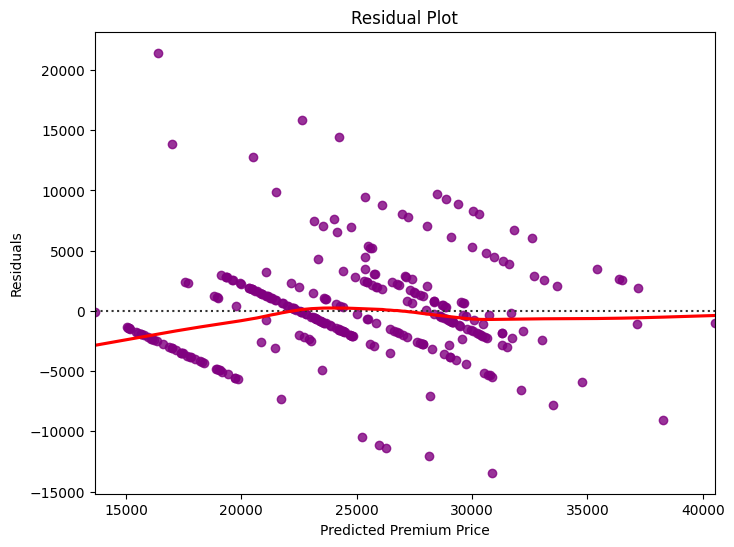

In [7]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color="purple", line_kws={"color": "red"})
plt.xlabel("Predicted Premium Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()
